In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set_style('darkgrid', rc={'ytick.left' : True})
pal = sns.color_palette(palette='icefire')
primary = pal[1]
secondary = pal[5]
highlight = pal[0]

In [24]:
def twin_plot(df):
    fig, ax = plt.subplots()

    sns.barplot(df, x='power', y='energy', label='Energy', legend=False, color=primary, ax=ax)
    ax.errorbar(x=range(len(df)), y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)
    axt = ax.twinx()
    sns.lineplot(x=range(len(df)), y=df['runtime'], label='Runtime', legend=False, color=secondary, linewidth=2.5, ax=axt)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(highlight)
            break

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2)

    axt.set_ylim((0,None))
    axt.grid(False)
    
    plt.tight_layout()
    plt.show()

In [30]:
def plot(path):
    df = pd.read_csv(path, names=['name', 'size', 'power', 'powersd', 'runtime', 'runtimesd', 'energy', 'energysd'])

    for (name, size), group in df.groupby(['name', 'size']):
        print(name, size)
        twin_plot(group)
        break

nbody 25000


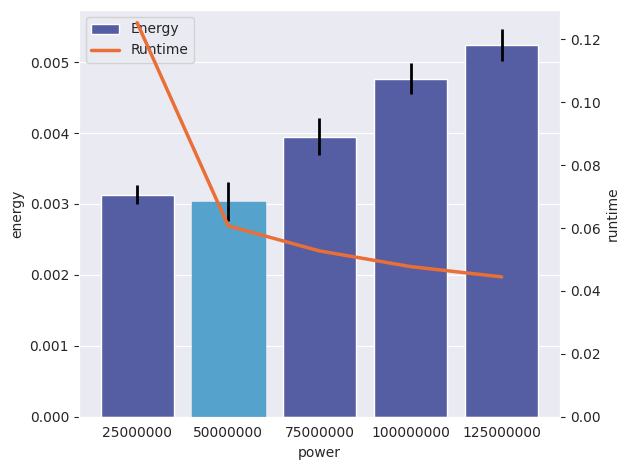

In [31]:
plot('results_sel265k/nbody.csv')

stencil 10000


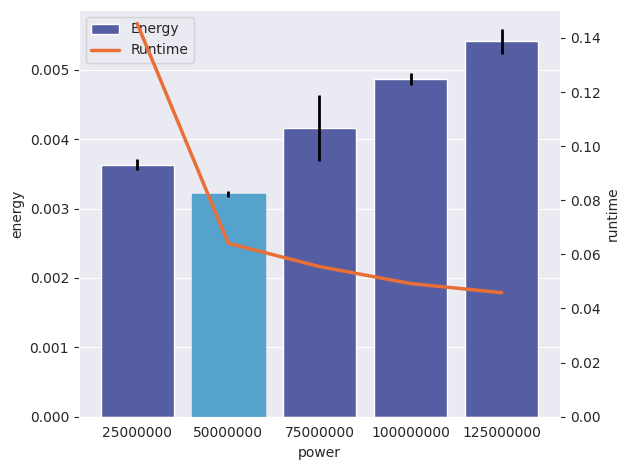

In [32]:
plot('results_sel265k/stencil.csv')

matmul 1500


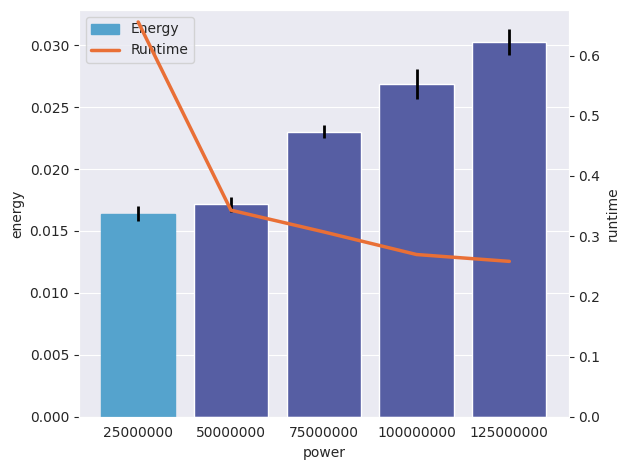

In [33]:
plot('results_sel265k/matmul.csv')

matmul_naive 1000


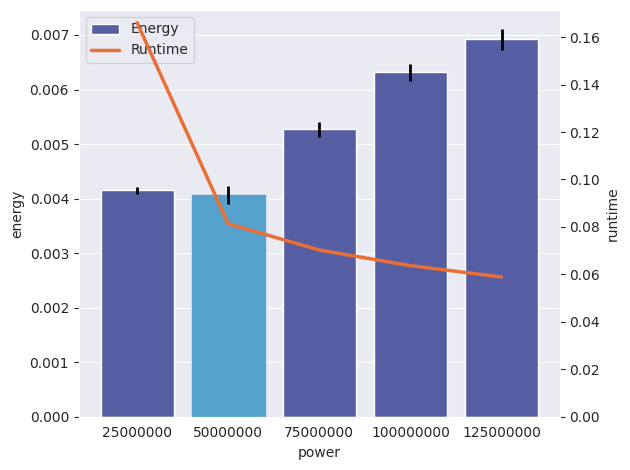

In [34]:
plot('results_sel265k/matmul_naive.csv')